# Train on Iris Dataset with MLFlow

In this simple example, we will train a Decision Tree Classifier on the Iris Dataset. We will use MLFlow to track the model parameters and metrics.

## Import dependencies

In [1]:
import numpy as np
import sklearn
import mlflow
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
from sklearn.datasets import load_iris


dataset = load_iris()

X = dataset["data"]
y = dataset["target"]

## Separate Features (X) and Labels (y)

In [5]:
from sklearn.model_selection import train_test_split

SEED_VALUE = 43
TRAIN_SPLIT = 0.8


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SPLIT, random_state=SEED_VALUE)

# Train model

In [6]:
from sklearn.tree import DecisionTreeClassifier

CRITERION = "gini"
MAX_DEPTH = 3


# Create a decision tree classifier
model = DecisionTreeClassifier(criterion=CRITERION, max_depth=MAX_DEPTH, random_state=SEED_VALUE)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=43)

# Evaluate the model

In [8]:
y_pred = model.predict(X_test)

### Evaluate accuracy, precision and recall

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


accuracy = accuracy_score(y_test, y_pred)
precission = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")


print(f"Seed {SEED_VALUE}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precission}")
print(f"Recall: {recall}")

Seed 43
Accuracy: 0.8666666666666667
Precision: 0.8771428571428572
Recall: 0.8666666666666667


### Create Confusion Matrix

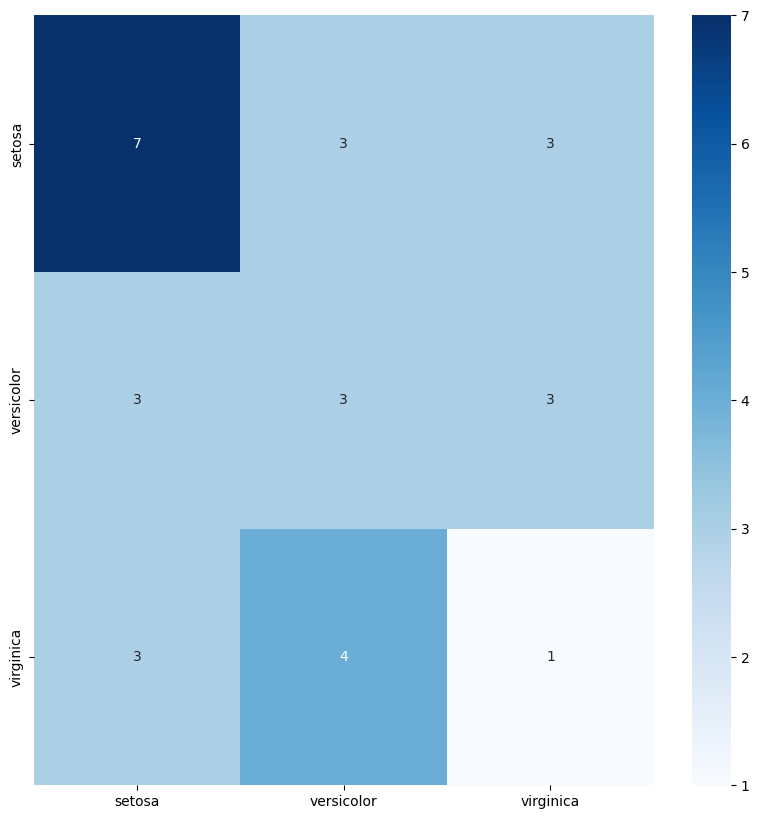

In [17]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    conf,
    ax=ax,
    annot=True,
    cmap="Blues",
    fmt="d", 
    xticklabels=dataset.target_names,
    yticklabels=dataset.target_names,
)

# Save confusion matrix
confusion_matrix_fig_path = "confusion_matrix.png"
plt.savefig(confusion_matrix_fig_path)

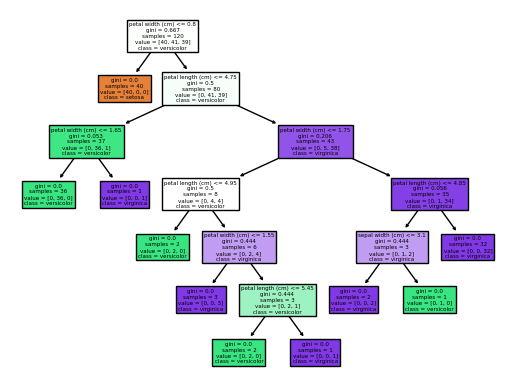

In [23]:
from sklearn import tree


# plot decision tree
tree.plot_tree(
    model,
    feature_names=dataset.feature_names,
    class_names=dataset.target_names,
    filled=True,
)

# Save decision tree plot
decision_tree_fig_path = "decision_tree.png"
plt.savefig(decision_tree_fig_path)

## Log data to MLFlow

In [ ]:
EXPERIMENT_NAME = "iris-project"  #  ❗ make sure this experiment exists
RUN_NAME = "iris-decision-tree"


# get the experiment id
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

# start the run
with mlflow.start_run(
    experiment_id=experiment_id,
    run_name=RUN_NAME,
) as run:
   
    # set the tags
    mlflow.set_tags({"default_model_params": False})
    
    # Log the model parameters
    mlflow.log_param("random_seed", SEED_VALUE)
    mlflow.log_param("train_split", TRAIN_SPLIT)
    mlflow.log_param("criterion", CRITERION)
    mlflow.log_param("max_depth", MAX_DEPTH)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precission)
    mlflow.log_metric("recall", recall)

    # log the plots as artifacts
    mlflow.log_artifact(confusion_matrix_fig_path)
    mlflow.log_artifact(decision_tree_fig_path)

    # log the model as an artifact
    mlflow.sklearn.log_model(model, "model")